In [1]:
import serial
import time
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
ser = serial.Serial()

In [3]:
ser.baudrate = 38400 
ser.port = 'COM3' 
ser.parity=serial.PARITY_EVEN

ser.timeout=2
print ser.name
print ser
ser.open()
ser.is_open

COM3
Serial<id=0x262b190, open=False>(port='COM3', baudrate=38400, bytesize=8, parity='E', stopbits=1, timeout=2, xonxoff=False, rtscts=False, dsrdtr=False)


True

In [4]:
from C1120402 import *

In [5]:
def send_command(Command, param = None) : 
    """send the Command (string) to the module, and return the answer.
    See upper for examples of the commands"""
    #get the checksum and the command line
    STX = 0x02
    ETX = 0x03
    CR = 0x0D
    Check_sum = check_sum(Command, param)
    if param : 
        command_line = chr(STX)+Command+str(param)+chr(ETX)+str(Check_sum)+'\r'
    else :
        command_line = chr(STX)+Command+chr(ETX)+str(Check_sum)+'\r'        
    command_line=command_line.upper()
    #print `command_line`
    #Send the command_line to the module
    ser.write(command_line)
    ser.flush()
    out = ''
    # let's wait one second before reading output (let's give device time to answer)
    if Command != 'HRE':
        time.sleep(0.5)
    else :
        time.sleep(15)
    while ser.inWaiting() > 0:
        out += ser.read(1)
    if check_the_sum(out) :
        return out
    else :
        print "Check SUM error ! WARNING !"
        return out

In [6]:
param = None

# Get the monitor information and status

Command = "HPO"
out = send_command(Command, param)
print `out`
translate_command_HPO(out, vocal = False)


'\x02hpo40496AEF563A0000BA6A\x03B8\r'

100000001001001
High voltage output : ON
Overcurrent protection : Not working
Output current value : within specification, value is more than 2mA
Temperature sensor connect : Temperature sensor is connected and operating temperature is  -30 to 100 degree
Operating temperature limit : Operating temperature is -20 to 60 degree

WARNING DOCUMENTATION : Temperature correction : Disable



Automatic restoration : not working
Voltage suppression : not working
Output voltage control : Not working

Voltage stability : stable

Voltage : 39.998088 V
Current : 0.0 mA
Temperature : 22.7166290909 �C


In [7]:
# Get output t°
Command = "HGT"
out = send_command(Command, param)
#print `out`
translate_command_HGT(out, vocal = False)

V = []
I = []
T = []
for i in [x / 100. for x in range(4000, 5000, 50)]+[x / 100. for x in range(5000, 5500, 5)]+[x / 100. for x in range(5500, 6000, 20)]:
    #vocal_temperature_correction()
    param = HST_param(DTp1 = 0., DTp2 = 0., DT1 = 0., DT2 = 0., V_b = float(i), T_b = 25.)
    out = send_command("HST", param)
    #print `out`
    print translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)
    time.sleep(1)
    # Get output voltage
    out = send_command("HGV", None)
    V.append(translate_command_HGV(out, vocal = False))
    # Get output current
    out = send_command("HGC", None)
    I.append(translate_command_HGC(out, vocal = False))
    # Get output t°
    out = send_command("HGT", None)
    T.append(translate_command_HGT(out, vocal = False))
    
param = HST_param(DTp1 = 0., DTp2 = 0., DT1 = 0., DT2 = 0., V_b = 40., T_b = 25.)
out = send_command("HST", param)
#print `out`
print translate_command_HST_HOF_HON_HRE_HCM_HSC_HBV(out)

Temperature : 22.7200963636 �C
hst
Voltage : 40.010772 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 40.503636 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 41.009184 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 41.505672 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 42.005784 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 42.505896 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 43.00782 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 43.507932 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 44.008044 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 44.506344 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 45.006456 V
Current : 0.0 mA
Temperature : 22.7200963636 �C
hst
Voltage : 45.506568 V
Current : 0.0 mA
Temperature : 22.7166290909 �C
hst
Voltage : 46.004868 V
Current : 0.0 mA
Temperature : 22.7166290909 �C
hst
Volt

hst
Voltage : 54.448788 V
Current : 0.020776 mA
Temperature : 22.7374327273 �C
hst
Voltage : 54.497712 V
Current : 0.020776 mA
Temperature : 22.7409 �C
hst
Voltage : 54.548448 V
Current : 0.020776 mA
Temperature : 22.7409 �C
hst
Voltage : 54.599184 V
Current : 0.020776 mA
Temperature : 22.7409 �C
hst
Voltage : 54.651732 V
Current : 0.020776 mA
Temperature : 22.7409 �C
hst
Voltage : 54.697032 V
Current : 0.020776 mA
Temperature : 22.7443672727 �C
hst
Voltage : 54.74958 V
Current : 0.020776 mA
Temperature : 22.7443672727 �C
hst
Voltage : 54.796692 V
Current : 0.020776 mA
Temperature : 22.7478345455 �C
hst
Voltage : 54.847428 V
Current : 0.020776 mA
Temperature : 22.7478345455 �C
hst
Voltage : 54.898164 V
Current : 0.02597 mA
Temperature : 22.7478345455 �C
hst
Voltage : 54.947088 V
Current : 0.02597 mA
Temperature : 22.7478345455 �C
hst
Voltage : 55.001448 V
Current : 0.031164 mA
Temperature : 22.7513018182 �C
hst
Voltage : 55.195332 V
Current : 0.036358 mA
Temperature : 22.7513018182 �C


In [8]:
print V
print I
print T

[40.010772, 40.503636, 41.009184, 41.505672000000004, 42.005784, 42.505896, 43.00782, 43.507932000000004, 44.008044, 44.506344, 45.006456, 45.506568, 46.004868, 46.506792, 46.999656, 47.499768, 47.998068, 48.49818, 48.998292, 49.498404, 49.996704, 50.049252, 50.099988, 50.148912, 50.199648, 50.24676, 50.299308, 50.348232, 50.398968, 50.449704000000004, 50.498628000000004, 50.549364000000004, 50.598288000000004, 50.647212, 50.69976, 50.746872, 50.79942, 50.848344, 50.89908, 50.949816, 50.99874, 51.049476, 51.0984, 51.149136, 51.199872, 51.248796, 51.301344, 51.348456, 51.399192, 51.449928, 51.498852, 51.549588, 51.598512, 51.649248, 51.699984, 51.747096, 51.799644, 51.846756, 51.897492, 51.948228, 51.998964, 52.0497, 52.098624, 52.151172, 52.198284, 52.247208, 52.299756, 52.34868, 52.399416, 52.446528, 52.499076, 52.549812, 52.596924, 52.649472, 52.696584, 52.74732, 52.798056, 52.848792, 52.899528000000004, 52.948452, 52.999188000000004, 53.049924000000004, 53.098848000000004, 53.149584

Text(0.5,1,u'Study of the breakdown voltage by the I-V curve')

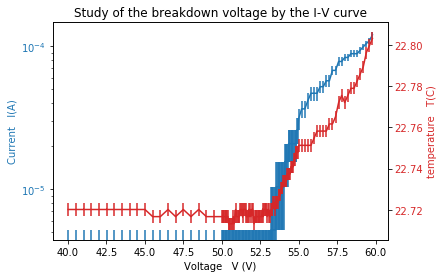

In [9]:
fig, ax1 = plt.subplots()

IA = [i/1000 for i in I]

color = 'tab:blue'
ax1.set_xlabel("Voltage   V (V)")
ax1.set_ylabel("Current   I(A)", color = color)
ax1.errorbar(V, IA, xerr = 0.001812, yerr=0.005194/1000, color = color)
ax1.tick_params(axis='y', labelcolor=color)
plt.yscale('log')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel("temperature   T(C)", color=color)
ax2.errorbar(V, T, xerr = 0.001812, yerr=0.003, color=color)
ax2.tick_params(axis='y', labelcolor=color)


#plt.errorbar(V, I, xerr = 0.001812, yerr=0.005194)
#plt.errorbar(V, T,  xerr = 0.001812, yerr=0.005194)
#plt.ylabel("I(mA)")
#plt.xlabel("V(V)")
plt.title("Study of the breakdown voltage by the I-V curve")
#résolution en tension : 0.001812 V
#résolution en courrant : 0.005194 mA
#résolution en température : 0.003 °C

Text(0.5,1,u'Study of the breakdown voltage by the sqrtI-V curve')

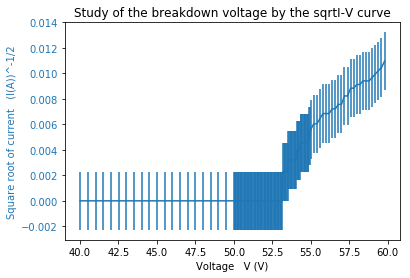

In [10]:
sqrtI = [sqrt(i/1000) for i in I]
#errSqrtI = [0.005194/(2*sqrt(i)) for i in I ]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("Voltage   V (V)")
ax1.set_ylabel("Square root of current   (I(A))^-1/2", color = color)
ax1.errorbar(V, sqrtI, xerr = 0.001812, yerr=sqrt(0.005194/1000), color = color)
ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()

#color = 'tab:red'
#ax2.set_ylabel("temperature   T(C)", color=color)
#ax2.errorbar(V, T, xerr = 0.001812, yerr=0.003, color=color)
#ax2.tick_params(axis='y', labelcolor=color)


#plt.errorbar(V, I, xerr = 0.001812, yerr=0.005194)
#plt.errorbar(V, T,  xerr = 0.001812, yerr=0.005194)
#plt.ylabel("I(mA)")
#plt.xlabel("V(V)")
plt.title("Study of the breakdown voltage by the sqrtI-V curve")
#résolution en tension : 0.001812 V
#résolution en courrant : 0.005194 mA
#résolution en température : 0.003 °C

In [12]:
for i in range(len(V)) :
    if I[i] >0. :
        print I[i], V[i]
        break

0.005194 53.198508
